<a href="https://colab.research.google.com/github/lucaszanon55/twitter-mining-and-ABSA-with-Textblob/blob/main/Twitter_mining_and_ABSA_Zanon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mineração Tweepy

In [ ]:
!pip install tweepy
import tweepy
import pandas as pd

In [ ]:
#twitter credentials
consumer_key = "wrpTHJB9Epa2B8FbL2gU1inN9"
consumer_secret = "6JWuQLDlnw4vjTWM7F7k5NFkE4b20ljXcbjwvtQcbVtbHTKRIp"
access_token = "1374767342396268544-awGuXVQJJxB7xC7Hx8g0ntpyd4cWlx"
access_token_secret = "p8dxq5kOLkvW9jXnvKxqI4rMFZjJENb2LyE5tT8ZKNDq4"

In [ ]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth, wait_on_rate_limit_notify=True)

In [ ]:
#Criando Lista com as chaves desejadas
twkeys = ['created_at', 'id', 'text']
twkeys

['created_at', 'id', 'text']

In [ ]:
# Criando dicionário com as chaves desejadas
tweets_dict = {}
tweets_dict = tweets_dict.fromkeys(twkeys)

In [ ]:
# Parametros de busca
query = "galaxy s21 AND screen" + " -filter:retweets"
language = "en"
# data_since = '2021-10-01'
# data_until = '2021-10-12'
qtdd = 5000
# Calling the user_timeline function with our parameters
results = tweepy.Cursor(api.search, q=query, lang=language).items(qtdd)



In [ ]:
# for tweet in results:
#   for key in tweets_dict.keys():
#     try:
#       twkey = tweet._json[key]
#       tweets_dict[key].append(twkey)
#     except KeyError:
#       twkey = ""
#       tweets_dict[key].append("")
#     except:
#       tweets_dict[key] = [twkey]

TweepError: ignored

In [ ]:
dfTweets = pd.DataFrame.from_dict(tweets_dict)
dfTweets

In [ ]:
# Nomeando arquvio
nomeNum = len(query) - len(" -filter:retweets")
nome = query[:nomeNum]

from datetime import date

data_atual = date.today()
print(data_atual)

nomeArquivo = "{} {}.csv".format(nome, data_atual)

In [ ]:
dfTweets.to_csv(nomeArquivo)

In [ ]:
print(nomeArquivo)

# Mineração Twitter Search


In [ ]:
#Importando bibliotecas
from datetime import datetime
import json
import pandas as pd
import tweepy
import nltk
import re

In [ ]:
#twitter credentials
consumer_key = consumer_key,
consumer_secret = consumer_secret,
access_token = access_token,
access_token_secret = access_token_secret


In [ ]:
#Instalação TwitterSearch
! pip install TwitterSearch

In [ ]:
from TwitterSearch import *

try:

  ts = TwitterSearch(
      consumer_key = consumer_key,
      consumer_secret = consumer_secret,
      access_token = access_token,
      access_token_secret = access_token_secret
  )

  tso = TwitterSearchOrder()
  tso.set_keywords(['iphone 13', 'iphone13'], or_operator = True)
  tso.set_language('en')
  tso.add_keyword(['-filter:retweets'])
  tso.add_keyword(['camera','battery','screen','price','design','performance','display'], or_operator = True)

  for tweet in ts.search_tweets_iterable(tso):

    print('created_at: ',tweet['created_at'], 'User_id: ',tweet['id_str'],'Tweet: ',tweet['text'])

    created_at = tweet['created_at']
    user_id = tweet['id_str']
    texto = tweet['text']

    with open("tweet.json", "a+") as output:

      data = {"created_at": created_at,
              "User_id": user_id,
              "tweet":texto}

      output.write("{}\n".format(json.dumps(data)))

except TwitterSearchException as e:
  print(e)

In [ ]:
df = pd.read_json('tweet.json', lines = True)

In [ ]:
df

,created_at,User_id,tweet
0,2021-11-21 21:30:06+00:00,1462533805525319680,[Dome Beads Case] #iPhone13 Silicone Gel Case\...
1,2021-11-21 21:17:03+00:00,1462530522173919232,[Dome EZ Glass] screen protector for iPhone 13...
2,2021-11-21 21:13:03+00:00,1462529514551095296,Whitestone Dome Scope Case for iPhone 13 https...
3,2021-11-21 20:41:18+00:00,1462521523827359744,How to Remove ‘Oil painting effect’ on iPhone ...
4,2021-11-21 20:32:56+00:00,1462519418249003008,Anyone else NOT experiencing the “longer batte...
...,...,...,...
5311,2021-11-14 01:04:41+00:00,1459688706080579584,Camera Len Tempered Glass Protective 3D Full P...
5312,2021-11-14 01:04:31+00:00,1459688663697268736,"Best iPhone 13 Accessories - Cases, Screen Pro..."
5313,2021-11-14 01:03:56+00:00,1459688515294445568,"Best iPhone 13 Accessories - Cases, Screen Pro..."
5314,2021-11-14 01:03:17+00:00,1459688351439769600,"Best iPhone 13 Accessories - Cases, Screen Pro..."


In [ ]:
# Nomeando arquvio
nome = "iphone 13 geral"

from datetime import date

data_atual = date.today()
print(data_atual)

nomeArquivo = "{} {}.csv".format(nome, data_atual)

2021-11-21


In [ ]:
df.to_csv(nomeArquivo)

#Chamando Arquivos

In [ ]:
#Chamando arquivos
dfIphone13battery = pd.read_csv('galaxy s21 AND battery 2021-10-26.csv', index_col = 0)
dfIphone13camera = pd.read_csv('galaxy s21 AND camera 2021-10-26.csv', index_col = 0)
dfIphone13design = pd.read_csv('galaxy s21 AND design 2021-10-26.csv', index_col = 0)
dfIphone13display = pd.read_csv('galaxy s21 AND display 2021-10-26.csv', index_col = 0)
dfIphone13performance = pd.read_csv('galaxy s21 AND performance 2021-10-26.csv', index_col = 0)
dfIphone13price = pd.read_csv('galaxy s21 AND price 2021-10-26.csv', index_col = 0)
dfIphone13screen = pd.read_csv('galaxy s21 AND screen 2021-10-26.csv', index_col = 0)
dfIphone13batteryj = pd.read_csv('galaxys21 AND battery 2021-10-26.csv', index_col = 0)
dfIphone13cameraj = pd.read_csv('galaxys21 AND camera 2021-10-26.csv', index_col = 0)
dfIphone13designj = pd.read_csv('galaxys21 AND design 2021-10-26.csv', index_col = 0)
dfIphone13displayj = pd.read_csv('galaxys21 AND display 2021-10-26.csv', index_col = 0)
dfIphone13performancej = pd.read_csv('galaxys21 AND performance 2021-10-26.csv', index_col = 0)
dfIphone13pricej = pd.read_csv('galaxys21 AND price 2021-10-26.csv', index_col = 0)
dfIphone13screenj = pd.read_csv('galaxys21 AND screen 2021-10-26.csv', index_col = 0)

#Chamando arquivos iphone 13
# dfExtracao1Iphone13 = pd.read_csv('iphone geral 2021-10-25.csv', index_col = 0)
# dfExtracao2Iphone13 = pd.read_csv('iphone geral 2021-11-01.csv', index_col = 0)
# dfExtracao3Iphone13 = pd.read_csv('iphone 13 geral 2021-11-11.csv', index_col = 0)
# dfExtracao4Iphone13 = pd.read_csv('iphone 13 geral 2021-11-21.csv', index_col = 0)

#Chamando arquivos galaxy S21
dfExtracao1GalaxyS21 = pd.read_csv('galaxy geral 2021-10-26.csv', index_col = 0)
dfExtracao2GalaxyS21 = pd.read_csv('galaxy geral 2021-11-06.csv', index_col = 0)
dfExtracao3GalaxyS21 = pd.read_csv('Galaxy S21 2021-11-11.csv', index_col = 0)
dfExtracao4GalaxyS21 = pd.read_csv('sansung S21 geral 2021-11-21.csv', index_col = 0)



In [ ]:
#dfCompilado = pd.concat([dfGalaxyS21battery, dfGalaxyS21camera, dfGalaxyS21design, dfGalaxyS21display, dfGalaxyS21performance, dfGalaxyS21price, dfGalaxyS21screen, dfGalaxyS21cameraj, dfGalaxyS21displayj, dfGalaxyS21pricej, dfGalaxyS21screenj])
dfCompilado = pd.concat([dfExtracao1GalaxyS21, dfExtracao2GalaxyS21, dfExtracao3GalaxyS21, dfExtracao4GalaxyS21])
dfCompilado

,created_at,User_id,tweet
0,Mon Oct 25 18:03:17 +0000 2021,1452697285310230540,@khi_daking4 @a_for_albert @realutsavdoshi My ...
1,Mon Oct 25 14:42:49 +0000 2021,1452646838922776587,Samsung Galaxy S21 Ultra Power Bank Case https...
2,Mon Oct 25 12:16:32 +0000 2021,1452610025667563525,The September Security Patch for the Samsung G...
3,Mon Oct 25 07:29:59 +0000 2021,1452537911455338497,Galaxy S21 battery replacement | S21 Plus | Ge...
4,Sun Oct 24 18:02:38 +0000 2021,1452334733036343306,"With a sleek new design, hyperfast processing ..."
...,...,...,...
2718,2021-11-13 11:17:13+00:00,1459480464637399040,Sell/buy/repair Samsung smartphones best price...
2719,2021-11-13 08:42:52+00:00,1459441622890913792,Sell/buy/repair Samsung smartphones best price...
2720,2021-11-13 08:42:37+00:00,1459441559628173312,Sell/buy/repair Samsung smartphones best price...
2721,2021-11-13 04:07:58+00:00,1459372439763243008,Sell/buy/repair Samsung smartphones best price...


In [ ]:
dfCompilado.reset_index(inplace=True)
dfCompilado.drop(columns=['index'], inplace=True)

In [ ]:
dfCompilado


,created_at,User_id,tweet
0,Mon Oct 25 18:03:17 +0000 2021,1452697285310230540,@khi_daking4 @a_for_albert @realutsavdoshi My ...
1,Mon Oct 25 14:42:49 +0000 2021,1452646838922776587,Samsung Galaxy S21 Ultra Power Bank Case https...
2,Mon Oct 25 12:16:32 +0000 2021,1452610025667563525,The September Security Patch for the Samsung G...
3,Mon Oct 25 07:29:59 +0000 2021,1452537911455338497,Galaxy S21 battery replacement | S21 Plus | Ge...
4,Sun Oct 24 18:02:38 +0000 2021,1452334733036343306,"With a sleek new design, hyperfast processing ..."
...,...,...,...
7524,2021-11-13 11:17:13+00:00,1459480464637399040,Sell/buy/repair Samsung smartphones best price...
7525,2021-11-13 08:42:52+00:00,1459441622890913792,Sell/buy/repair Samsung smartphones best price...
7526,2021-11-13 08:42:37+00:00,1459441559628173312,Sell/buy/repair Samsung smartphones best price...
7527,2021-11-13 04:07:58+00:00,1459372439763243008,Sell/buy/repair Samsung smartphones best price...


In [ ]:
dfCompilado.rename(columns={"created_at": "created_at", "id": "User_id", "text": "tweet"}, inplace=True)
dfCompilado

,created_at,User_id,tweet
0,Mon Oct 25 18:03:17 +0000 2021,1452697285310230540,@khi_daking4 @a_for_albert @realutsavdoshi My ...
1,Mon Oct 25 14:42:49 +0000 2021,1452646838922776587,Samsung Galaxy S21 Ultra Power Bank Case https...
2,Mon Oct 25 12:16:32 +0000 2021,1452610025667563525,The September Security Patch for the Samsung G...
3,Mon Oct 25 07:29:59 +0000 2021,1452537911455338497,Galaxy S21 battery replacement | S21 Plus | Ge...
4,Sun Oct 24 18:02:38 +0000 2021,1452334733036343306,"With a sleek new design, hyperfast processing ..."
...,...,...,...
783,Sun Oct 17 11:42:00 +0000 2021,1449702231821864963,Sell/buy/repair Samsung smartphones best price...
784,Sun Oct 17 11:16:46 +0000 2021,1449695881045811201,Sell/buy/repair Samsung smartphones best price...
785,Sun Oct 17 06:49:05 +0000 2021,1449628516119564300,Sell/buy/repair Samsung smartphones best price...
786,Sun Oct 17 06:45:01 +0000 2021,1449627493002989573,Sell/buy/repair Samsung smartphones best price...


In [ ]:
dfCompilado.to_csv("galaxy geral 2021-10-26.csv")

In [ ]:
sentences = [
    'iPhone 13 Pro has incredible battery, lasting around 24 hours with 6 hours of screen on time. Just too good!',
    'Iphone 13 battery is so good bruh',
    'The iPhone 13 camera is wonderful',
    'The iphone 13 battery life is really good yo.',
    'The #iphone 13 pro has officially the worst design in terms of comfort in hand. Extremely inconvenient and causes joint pain #iPhone13Pro',
    '@BiteSizeRi No, what you need is the samsung galaxy s21 ultra.. that muthafucka got best camera not cap!',
    '@KellieADennis74 I got my new Galaxy S21 a few weeks ago. Its the prettiest phone I have ever had.',
    '@EzTech231 The Samsung Galaxy S21 Ultra is my favorite phone. Screens great and performance is great',
    '@ashdogx I have the Galaxy S21 Ultra and this phone is pretty darn big. The Camera is great and the battery life is fantastic',
]

df = pd.DataFrame(sentences, columns = ['tweet'])
df


,tweet
0,"iPhone 13 Pro has incredible battery, lasting ..."
1,Iphone 13 battery is so good bruh
2,The iPhone 13 camera is wonderful
3,The iphone 13 battery life is really good yo.
4,The #iphone 13 pro has officially the worst de...
5,"@BiteSizeRi No, what you need is the samsung g..."
6,@KellieADennis74 I got my new Galaxy S21 a few...
7,@EzTech231 The Samsung Galaxy S21 Ultra is my ...
8,@ashdogx I have the Galaxy S21 Ultra and this ...


#Pré-Processamento

In [ ]:
import re

In [ ]:
#Pre Processamento

def Preprocessing(instancia):

  #Limpa links, pontos, virgulas, ponto, virgula e tralha
  instancia = re.sub(r"http\S+","",instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace('#','')

  #Limpa menções
  instancia = re.sub(r"@\S+","",instancia).lower()

  #Limpa retweets & cc
  # instancia = re.sub(r'rt|cc', '',instancia).lower()

  #Limpa espaços extras
  instancia = re.sub(r' +', ' ',instancia).lower()

  #Limpa html tags
  instancia = re.sub(r'<.*?>', ' ',instancia).lower()

  #Limpa hashtags
  # instancia = re.sub(r'#\S+', ' ',instancia).lower()

  #Limpa emojis
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
  instancia = (emoji_pattern.sub(r'', instancia))

  #Limpa Stopwords
  #stopwords = set(nltk.corpus.stopwords.words('english'))
  #palavaras = [i for i in instancia.split() if not i in stopwords]
  #return (" ".join(palavaras))

  return(instancia)

In [ ]:
#Aplicando Pre Processamento
tweets = [Preprocessing(i) for i in df.tweet]

#Ultimo tratamento
newTweetsList = []
for i in tweets:
  newTweetsList.append(i.strip())
print(newTweetsList)

['iphone 13 pro has incredible battery, lasting around 24 hours with 6 hours of screen on time just too good!', 'iphone 13 battery is so good bruh', 'the iphone 13 camera is wonderful', 'the iphone 13 battery life is really good yo', 'the iphone 13 pro has officially the worst design in terms of comfort in hand extremely inconvenient and causes joint pain iphone13pro', 'no, what you need is the samsung galaxy s21 ultra that muthafucka got best camera not cap!', 'i got my new galaxy s21 a few weeks ago its the prettiest phone i have ever had', 'the samsung galaxy s21 ultra is my favorite phone screens great and performance is great', 'i have the galaxy s21 ultra and this phone is pretty darn big the camera is great and the battery life is fantastic']


In [ ]:
#Nova Coluna com os dados tratados

df['preprocessed'] = newTweetsList
df

,tweet,preprocessed
0,"iPhone 13 Pro has incredible battery, lasting ...","iphone 13 pro has incredible battery, lasting ..."
1,Iphone 13 battery is so good bruh,iphone 13 battery is so good bruh
2,The iPhone 13 camera is wonderful,the iphone 13 camera is wonderful
3,The iphone 13 battery life is really good yo.,the iphone 13 battery life is really good yo
4,The #iphone 13 pro has officially the worst de...,the iphone 13 pro has officially the worst des...
5,"@BiteSizeRi No, what you need is the samsung g...","no, what you need is the samsung galaxy s21 ul..."
6,@KellieADennis74 I got my new Galaxy S21 a few...,i got my new galaxy s21 a few weeks ago its th...
7,@EzTech231 The Samsung Galaxy S21 Ultra is my ...,the samsung galaxy s21 ultra is my favorite ph...
8,@ashdogx I have the Galaxy S21 Ultra and this ...,i have the galaxy s21 ultra and this phone is ...


In [ ]:
dfCompilado.drop_duplicates(subset=['tweet'])

,created_at,User_id,tweet,preprocessed
0,Mon Oct 25 18:03:17 +0000 2021,1452697285310230540,@khi_daking4 @a_for_albert @realutsavdoshi My ...,my problems with the devices\ns21 horrible bat...
1,Mon Oct 25 14:42:49 +0000 2021,1452646838922776587,Samsung Galaxy S21 Ultra Power Bank Case https...,samsung galaxy s21 ultra power bank case samsu...
2,Mon Oct 25 12:16:32 +0000 2021,1452610025667563525,The September Security Patch for the Samsung G...,the september security patch for the samsung g...
3,Mon Oct 25 07:29:59 +0000 2021,1452537911455338497,Galaxy S21 battery replacement | S21 Plus | Ge...,galaxy s21 battery replacement | s21 plus | ge...
4,Sun Oct 24 18:02:38 +0000 2021,1452334733036343306,"With a sleek new design, hyperfast processing ...","with a sleek new design, hyperfast processing ..."
...,...,...,...,...
7459,2021-11-13 11:17:13+00:00,1459480464637399040,Sell/buy/repair Samsung smartphones best price...,sell/buy/repair samsung smartphones best price...
7460,2021-11-13 08:42:52+00:00,1459441622890913792,Sell/buy/repair Samsung smartphones best price...,sell/buy/repair samsung smartphones best price...
7461,2021-11-13 08:42:37+00:00,1459441559628173312,Sell/buy/repair Samsung smartphones best price...,sell/buy/repair samsung smartphones best price...
7462,2021-11-13 04:07:58+00:00,1459372439763243008,Sell/buy/repair Samsung smartphones best price...,sell/buy/repair samsung smartphones best price...


# Extração de Aspectos

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [ ]:
!pip install nltk
!pip install stanfordnlp
!pip install stanza

In [ ]:
import stanfordnlp
import stanza
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
stanfordnlp.download('en')
stanza.download('en') # download English model
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
y

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /root/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [00:41<00:00, 5.63MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.


2021-11-22 07:03:50 INFO: Downloading default packages for language: en (English)...
2021-11-22 07:03:51 INFO: File exists: /root/stanza_resources/en/default.zip.
2021-11-22 07:03:57 INFO: Finished downloading models and saved to /root/stanza_resources.


[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
sentences = [
    'iPhone 13 Pro has incredible battery, lasting around 24 hours with 6 hours of screen on time. Just too good!',
    'Iphone 13 battery is so good bruh',
    'The iPhone 13 camera is wonderful',
    'The iphone 13 battery life is really good yo.',
    'The #iphone 13 pro has officially the worst design in terms of comfort in hand. Extremely inconvenient and causes joint pain #iPhone13Pro',
    '@BiteSizeRi No, what you need is the samsung galaxy s21 ultra.. that muthafucka got best camera not cap!',
    '@JM_Sparkle galaxy s21 series! it has very good battery life and all around excellent specs',
    '@KellieADennis74 I got my new Galaxy S21 a few weeks ago. Its the prettiest phone I have ever had.',
    '@EzTech231 The Samsung Galaxy S21 Ultra is my favorite phone. Screens great and performance is great',
    '@ashdogx I have the Galaxy S21 Ultra and this phone is pretty darn big. Camera is great battery life is fantastic',

  # 'The food we had yesterday was delicious, but the staff was rude',
  # 'My time in Italy was very enjoyable',
  # 'I found the meal to be tasty',
  # 'The internet was slow.',
  # 'The Sound Quality is great but the battery life is very bad.',
  # 'The hotel structure is great, but the staff was very rude.',
  # 'Our experience was terrible',
  # 'The battery has not a good performance, camera is amazing though',
  # 'The camera and resolution are perfect.'
  # 'the most impressive features of the apple iphone 13 is the extended battery life',
  # 'no question, quality control is a disaster',
  # 'launched the new with a few new changes and a muchimproved battery life',
  # 'the camera is awesome',
  # 'this camera is insane',
  # 'definitely got the beat for me this fucking camera!',
  # 'i love this iphone13, the camera is so bomb',
  # 'the quality of this camera is breathtaking',
  # 'the camera is pretty ok',
  # 'iphone 14 pro the best camera in an iphone and than ever',
  # 'this camera is amazing i got right up to the window he looks huge'
]


In [ ]:
listaFrases = []
#for i in sentences:
for i in newTweetsList:
  frase = i.lower()
  listaFrases.append(nltk.sent_tokenize(frase))
print(listaFrases)

[['iphone 13 pro has incredible battery, lasting around 24 hours with 6 hours of screen on time just too good!'], ['iphone 13 battery is so good bruh'], ['the iphone 13 camera is wonderful'], ['the iphone 13 battery life is really good yo'], ['the iphone 13 pro has officially the worst design in terms of comfort in hand extremely inconvenient and causes joint pain iphone13pro'], ['no, what you need is the samsung galaxy s21 ultra that muthafucka got best camera not cap!'], ['i got my new galaxy s21 a few weeks ago its the prettiest phone i have ever had'], ['the samsung galaxy s21 ultra is my favorite phone screens great and performance is great'], ['i have the galaxy s21 ultra and this phone is pretty darn big the camera is great and the battery life is fantastic']]


In [ ]:
taggedList = []
for i in listaFrases:
  listaTemporaria = []
  for frase in i:
      txt_list = nltk.word_tokenize(frase)
      listaTemporaria.append(nltk.pos_tag(txt_list))
      taggedList.append(listaTemporaria)


In [ ]:
print(taggedList[8])

[[('i', 'NNS'), ('have', 'VBP'), ('the', 'DT'), ('galaxy', 'NN'), ('s21', 'NN'), ('ultra', 'JJ'), ('and', 'CC'), ('this', 'DT'), ('phone', 'NN'), ('is', 'VBZ'), ('pretty', 'RB'), ('darn', 'JJ'), ('big', 'JJ'), ('the', 'DT'), ('camera', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('battery', 'NN'), ('life', 'NN'), ('is', 'VBZ'), ('fantastic', 'JJ')]]


In [ ]:
compiladoFrases = []
for i in taggedList:
  newwordList = []
  flag = 0
  listaSimples = i[0]
  for i in range(0,len(listaSimples)-1):
    if(listaSimples[i][1]=="NN" and listaSimples[i+1][1]=="NN"):
        newwordList.append(listaSimples[i][0]+listaSimples[i+1][0])
        flag=1
    else:
        if(flag==1):
            flag=0
            continue
        newwordList.append(listaSimples[i][0])
        if(i==len(listaSimples)-2):
            newwordList.append(listaSimples[i+1][0])
  finaltxt = ' '.join(word for word in newwordList)
  compiladoFrases.append(finaltxt)

In [ ]:
print(compiladoFrases[4])

the iphone 13 pro has officially the worst design in terms of comfort in hand extremely inconvenient and causes joint painiphone13pro


In [ ]:
new_txt_list_final = []
listaSemStopWords = []
listaSemStopWordsTagged = []
for i in compiladoFrases:
  stop_words = set(stopwords.words('english'))
  new_txt_list = nltk.word_tokenize(i)
  wordsList = [w for w in new_txt_list if not w in stop_words]
  new_txt_list_final.append( new_txt_list)
  listaSemStopWords.append(wordsList)
  listaSemStopWordsTagged.append(nltk.pos_tag(wordsList))
# print(new_txt_list_final[6])
# print(listaSemStopWords[6])
# print(listaSemStopWordsTagged[6])

In [ ]:
# nlp = stanza.Pipeline('en') # initialize English neural pipeline
# count = 0
# listaDep_node = []
# for i in compiladoFrases:
#   print(i)
#   doc = nlp(i)
#   dep_node = []
#   for dep_edge in doc.sentences[0].dependencies:
#       dep_node.append([dep_edge[2].text, dep_edge[0].id, dep_edge[1]])
#   newwordList = new_txt_list_final[count]
#   count = count + 1
#   for i in range(0, len(dep_node)):
#     if (int(dep_node[i][1]) != 0):
#       print(dep_node[i][1])
#       print(newwordList[(int(dep_node[i][1]) - 1)])
#       dep_node[i][1] = newwordList[(int(dep_node[i][1]) - 1)]
#   listaDep_node.append(dep_node)
# print(listaDep_node)

In [ ]:
nlp = stanza.Pipeline('en') # initialize English neural pipeline
count = 0
listaDep_node = []
for i in compiladoFrases:
  try:
    # print(i)
    doc = nlp(i)
    dep_node = []
    for dep_edge in doc.sentences[0].dependencies:
        dep_node.append([dep_edge[2].text, dep_edge[0].id, dep_edge[1]])
    newwordList = new_txt_list_final[count]
    count = count + 1
  except:
    print(f'essa frase foi descartada {i}')
    count = count + 1
  for i in range(0, len(dep_node)):
    try:
      if (int(dep_node[i][1]) != 0):
        dep_node[i][1] = newwordList[(int(dep_node[i][1]) - 1)]
    except:
        print(f'essa frase foi descartada {count}') 
  listaDep_node.append(dep_node)
print(listaDep_node)

2021-11-22 07:04:24 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2021-11-22 07:04:24 INFO: Use device: cpu
2021-11-22 07:04:24 INFO: Loading: tokenize
2021-11-22 07:04:25 INFO: Loading: pos
2021-11-22 07:04:25 INFO: Loading: lemma
2021-11-22 07:04:25 INFO: Loading: depparse
2021-11-22 07:04:25 INFO: Loading: sentiment
2021-11-22 07:04:26 INFO: Loading: constituency
2021-11-22 07:04:27 INFO: Loading: ner
2021-11-22 07:04:27 INFO: Done loading processors!


[[['iphone', 'pro', 'compound'], ['13', 'iphone', 'nummod'], ['pro', 'has', 'nsubj'], ['has', 0, 'root'], ['incredible', 'battery', 'amod'], ['battery', 'has', 'obj'], [',', 'lasting', 'punct'], ['lasting', 'has', 'advcl'], ['around', '24', 'advmod'], ['24', 'hours', 'nummod'], ['hours', 'lasting', 'obj'], ['with', 'hours', 'case'], ['6', 'hours', 'nummod'], ['hours', 'lasting', 'obl'], ['of', 'screen', 'case'], ['screen', 'hours', 'nmod'], ['on', 'time', 'case'], ['time', 'hours', 'nmod'], ['just', 'good', 'advmod'], ['too', 'good', 'advmod'], ['good', 'lasting', 'xcomp'], ['!', 'has', 'punct']], [['iphone', 'battery', 'compound'], ['13', 'iphone', 'nummod'], ['battery', 'good', 'nsubj'], ['is', 'good', 'cop'], ['so', 'good', 'advmod'], ['good', 0, 'root'], ['bruh', 'good', 'punct']], [['the', 'camera', 'det'], ['iphone', 'camera', 'compound'], ['13', 'iphone', 'nummod'], ['camera', 'wonderful', 'nsubj'], ['is', 'wonderful', 'cop'], ['wonderful', 0, 'root']], [['the', 'batterylife', '

In [ ]:
featureList = []
totalfeatureList = []
categories = []
categoriesList = []

for frasesTagged in listaSemStopWordsTagged:
  featureListTemp = []
  totalfeatureListTemp = []
  categoriesTemp = []
  categoriesListTemp = []
  for i in frasesTagged:
      if(i[1]=='JJ' or i[1]=='NN' or i[1]=='JJR' or i[1]=='NNS' or i[1]=='RB'):
          featureListTemp.append(list(i))
          totalfeatureListTemp.append(list(i)) # This list will store all the features for every sentence
          categoriesTemp.append(i[0])
  featureList.append(featureListTemp)
  totalfeatureList.append(totalfeatureListTemp)
  categories.append(categoriesTemp)
  categoriesList.append(categoriesListTemp)

In [ ]:
print(categories[4])


['iphone', 'batterylife', 'really', 'good', 'yo']


In [ ]:
fcluster = []
count = 0
for frasesTagged in featureList:
  fclusterTemp = []
  for i in frasesTagged:
      filist = []
      listaTemp = listaDep_node[count]
      for j in listaTemp:
          if((j[0]==i[0] or j[1]==i[0]) and (j[2] in ["nsubj", "acl:relcl", "obj", "dobj", "agent", "advmod", "amod", "neg", "prep_of", "acomp", "xcomp", "compound"])):
              if(j[0]==i[0]):
                  filist.append(j[1])
              else:
                  filist.append(j[0])
      fclusterTemp.append([i[0], filist])
  count = count + 1
  fcluster.append(fclusterTemp)
print(fcluster)

[[['iphone', ['pro']], ['pro', ['iphone', 'has']], ['incredible', ['battery']], ['battery', ['incredible', 'has']], ['around', ['24']], ['hours', ['lasting']], ['hours', ['lasting']], ['screen', []], ['time', []], ['good', ['just', 'too', 'lasting']]], [['iphone', ['battery']], ['battery', ['iphone', 'good']], ['good', ['battery', 'so']], ['bruh', []]], [['iphone', ['camera']], ['camera', ['iphone', 'wonderful']], ['wonderful', ['camera']]], [['iphone', ['batterylife']], ['batterylife', ['iphone', 'good']], ['really', ['good']], ['good', ['batterylife', 'really']], ['yo', []]], [['iphone', ['pro']], ['pro', ['iphone', 'has']], ['officially', ['has']], ['design', ['worst', 'has']], ['terms', []], ['hand', []], ['extremely', ['inconvenient']], ['inconvenient', ['extremely', 'has']], ['causes', ['painiphone13']], ['joint', ['painiphone13pro']], ['painiphone13pro', ['joint']]], [['samsunggalaxy', ['ultra']], ['galaxys21', ['ultra']], ['ultra', ['what', 'samsunggalaxy', 'galaxys21', 'got']]

In [ ]:
finalcluster = []
ListaDic = []
for frasesTagged in featureList:
  dic = {}
  for i in frasesTagged:
      dic[i[0]] = i[1]
  ListaDic.append(dic)

count = 0
for frasesClustered in fcluster:
  clusterIntermediario = []
  dic = ListaDic[count]
  for i in frasesClustered:
    if(dic[i[0]]=="NN"):
        clusterIntermediario.append(i)
        # print(clusterIntermediario)
  finalcluster.append(clusterIntermediario)
  count = count + 1

In [ ]:
print(finalcluster[8])

[['galaxys21', ['ultra']], ['phone', ['big']], ['camera', ['great']], ['batterylife', ['fantastic']]]


In [ ]:
listaAdjetivos = []
for i in finalcluster:
  for j in i:
    # print(j)
    if len(j[1]) > 1:
      for num in range (len(j[1])):
        # print(j[1])
        # print(num)
        listaAdjetivos.append(j[1][num])
    elif len(j[1]) == 1:
      for num in range (len(j[1])):
        listaAdjetivos.append(j[1][num])
print(listaAdjetivos)

listaAspectos = []
for i in finalcluster:
  for j in i:
    if len(j[1]) > 1:
      for num in range (len(j[1])):
        listaAspectos.append(j[0])
    elif len(j[1]) == 1:
      for num in range (len(j[1])):
        listaAspectos.append(j[0])
print(listaAspectos)

['pro', 'incredible', 'has', 'battery', 'iphone', 'good', 'camera', 'iphone', 'wonderful', 'camera', 'batterylife', 'iphone', 'good', 'pro', 'worst', 'has', 'ultra', 'got', 'best', 'got', 'not', 'got', 'new', 'galaxy', 'got', 'prettiest', 'had', 's21ultra', 's21ultra', 'screens', 'great', 'ultra', 'big', 'great', 'fantastic']
['iphone', 'battery', 'battery', 'iphone', 'battery', 'battery', 'iphone', 'camera', 'camera', 'wonderful', 'iphone', 'batterylife', 'batterylife', 'iphone', 'design', 'design', 'galaxys21', 'muthafucka', 'camera', 'camera', 'cap', 'cap', 's21', 's21', 's21', 'phonei', 'phonei', 'samsunggalaxy', 'galaxys21', 'phone', 'performance', 'galaxys21', 'phone', 'camera', 'batterylife']


In [ ]:
dfFinal = pd.DataFrame(listaAspectos, columns = ['Aspectos'])
dfFinal['Adjetivos'] = listaAdjetivos
dfFinal

,Aspectos,Adjetivos
0,iphone,pro
1,battery,incredible
2,battery,has
3,iphone,battery
4,battery,iphone
5,battery,good
6,iphone,camera
7,camera,iphone
8,camera,wonderful
9,wonderful,camera


# Analise de Sentimento

In [ ]:
!pip install TextBlob
!pip install wordcloudimport tweepy
import textblob  
import wordcloud
from textblob import TextBlob
!pip install -U textblob
!python -m textblob.download_corpora
nltk.download('movie_reviews')
nltk.download('punkt')
import numpy as np

ERROR: Could not find a version that satisfies the requirement wordcloudimport (from versions: none)
ERROR: No matching distribution found for wordcloudimport
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
[nltk_data] Downloading package movie_reviews to /root/nltk_

In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
listaNaive = []
# for i in listaAdjetivos:
#   blob = TextBlob(i, analyzer=NaiveBayesAnalyzer())
#   listaNaive.append(blob.sentiment)
# print(listaNaive) 

In [ ]:
# listaNaiveClassification = []
# listaNaivePos = []
# listaNaiveNeg = []
# for i in listaNaive:
#   listaNaiveClassification.append(i[0])
#   listaNaivePos.append(i[1])
#   listaNaiveNeg.append(i[2])
# print(listaNaiveClassification)
#listaNaiveNeg
#listaNaivePos

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

listaSub = []
listaPolaridade = []
for i in listaAdjetivos:
  try:
    listaSub.append(getSubjectivity(i))
    listaPolaridade.append(getPolarity(i))
  except:
    listaSub.append(0.0)
    listaPolaridade.append(0.0)
dfFinal['Sub'] = listaSub
dfFinal['Polaridade'] = listaPolaridade
dfFinal

,Aspectos,Adjetivos,Sub,Polaridade
0,iphone,pro,0.000000,0.000000
1,battery,incredible,0.900000,0.900000
2,battery,has,0.000000,0.000000
3,iphone,battery,0.000000,0.000000
4,battery,iphone,0.000000,0.000000
5,battery,good,0.600000,0.700000
6,iphone,camera,0.000000,0.000000
7,camera,iphone,0.000000,0.000000
8,camera,wonderful,1.000000,1.000000
9,wonderful,camera,0.000000,0.000000


In [ ]:
dfFinal.to_csv("dfFinal.csv")

In [ ]:
listaFiltro = [0.0]
filtroAdjetivos = ~dfFinal['Polaridade'].isin(listaFiltro)

In [ ]:
resultado = dfFinal[filtroAdjetivos]
resultado

,Aspectos,Adjetivos,Sub,Polaridade
1,battery,incredible,0.900000,0.900000
5,battery,good,0.600000,0.700000
8,camera,wonderful,1.000000,1.000000
12,batterylife,good,0.600000,0.700000
14,design,worst,1.000000,-1.000000
18,camera,best,0.300000,1.000000
22,s21,new,0.454545,0.136364
30,performance,great,0.750000,0.800000
33,camera,great,0.750000,0.800000
34,batterylife,fantastic,0.900000,0.400000


In [ ]:
resultado.to_csv("resultado.csv")

#Sumarização

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

In [ ]:
s = pd.Series(list(resultado.Adjetivos))
listaAnalise = s.value_counts()

In [ ]:
dfAnalise = pd.DataFrame(listaAnalise, columns = ['Quantidade Adjetivos'])
dfAnalise.head(40)

,Quantidade Adjetivos
great,1
slow,1
delicious,1
enjoyable,1
bad,1
rude,1


In [ ]:
g = pd.Series(list(resultado.Aspectos))
listaAnaliseAspectos = g.value_counts()

dfAnalise = pd.DataFrame(listaAnaliseAspectos, columns = ['Quantidade Aspectos'])
dfAnalise.head(40)

,Quantidade Aspectos
sgfonefixsgipad…,62
display,22
cushion,20
galaxys21,17
protectorsamsung…,16
temp…,10
iphone,8
glass,8
camera,8
case,8


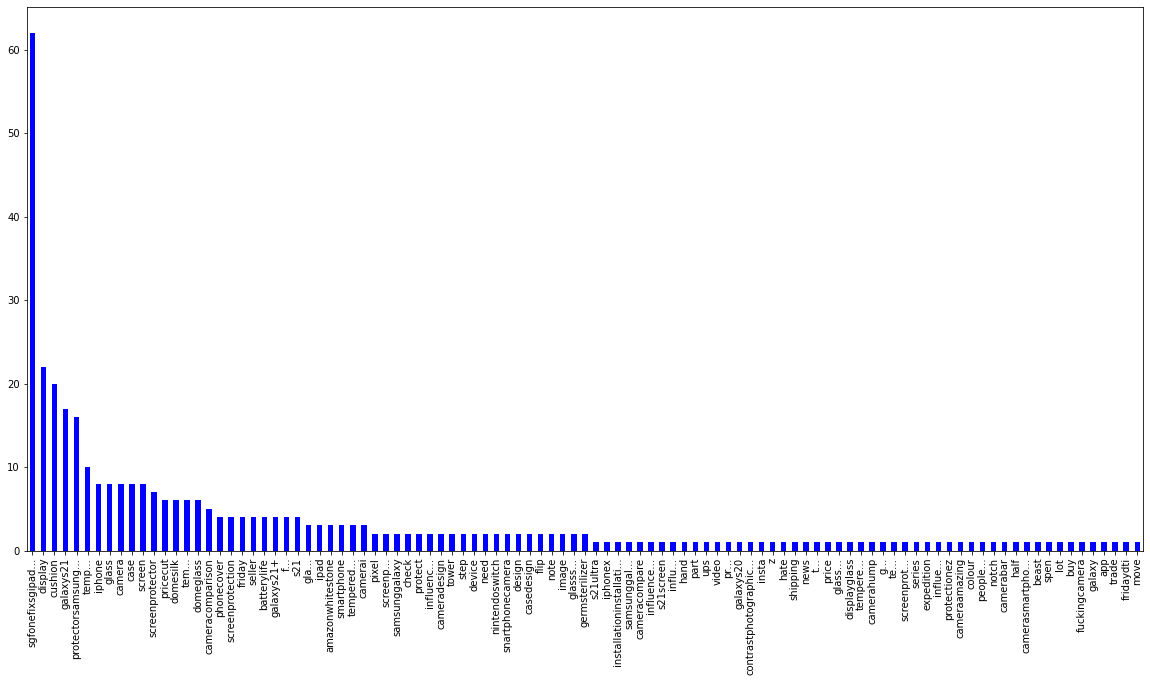

In [ ]:
fig = dfAnalise['Quantidade Aspectos'].plot.bar(color = 'blue')
fig